# Question

Create Random Forest on given dataset

Use Random Forest to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [8]:
# Imporing Libraries

import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing Datset

data=pd.read_csv("Fraud_check.csv")
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
data.shape

(600, 6)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


## Pairplot

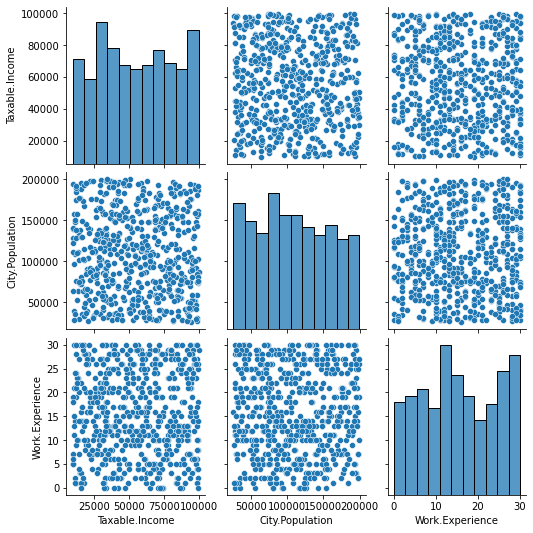

In [9]:
sns.pairplot(data)

## Boxplot

<AxesSubplot:xlabel='Work.Experience'>

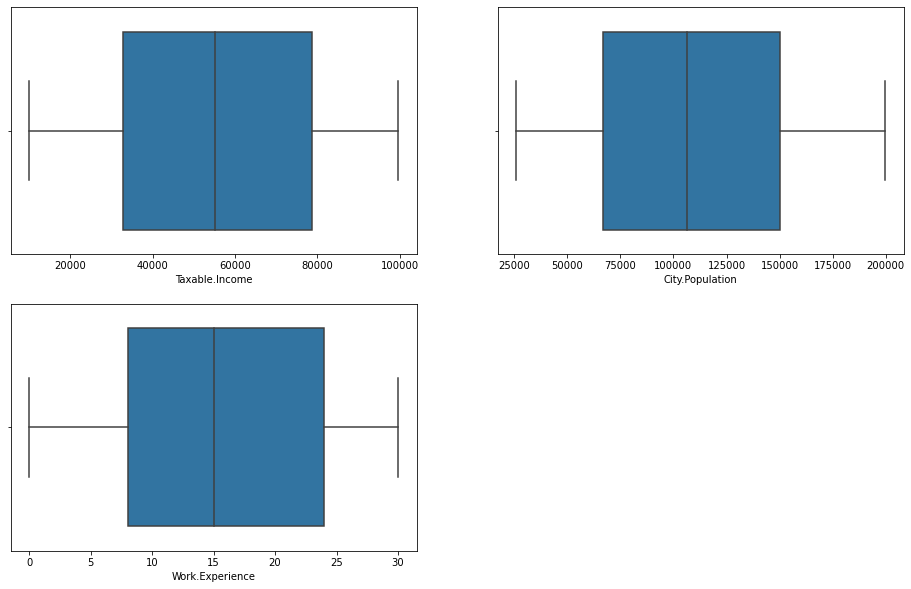

In [16]:
# Making boxplot
plt.subplots(figsize=(16, 10))

plt.subplot(2,2,1)
sns.boxplot(x=data["Taxable.Income"])

plt.subplot(2,2,2)
sns.boxplot(x=data["City.Population"])

plt.subplot(2,2,3)
sns.boxplot(x=data["Work.Experience"])

## Barplot

Text(0.5, 1.0, 'Urban')

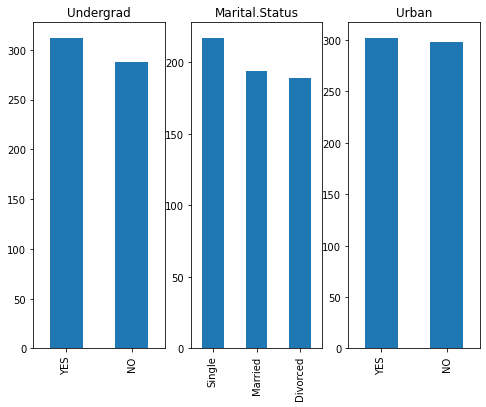

In [17]:
# Making Barplot on ('Urban','us' and 'ShelveLoc') by using Subplot
plt.subplots(figsize=(8,6))

plt.subplot(1,3,1)
data['Undergrad'].value_counts().plot.bar()
plt.title("Undergrad")

plt.subplot(1,3,2)
data['Marital.Status'].value_counts().plot.bar()
plt.title("Marital.Status")

plt.subplot(1,3,3)
data['Urban'].value_counts().plot.bar()
plt.title("Urban")

### Histogram

Text(0.5, 1.0, 'Work.Experience')

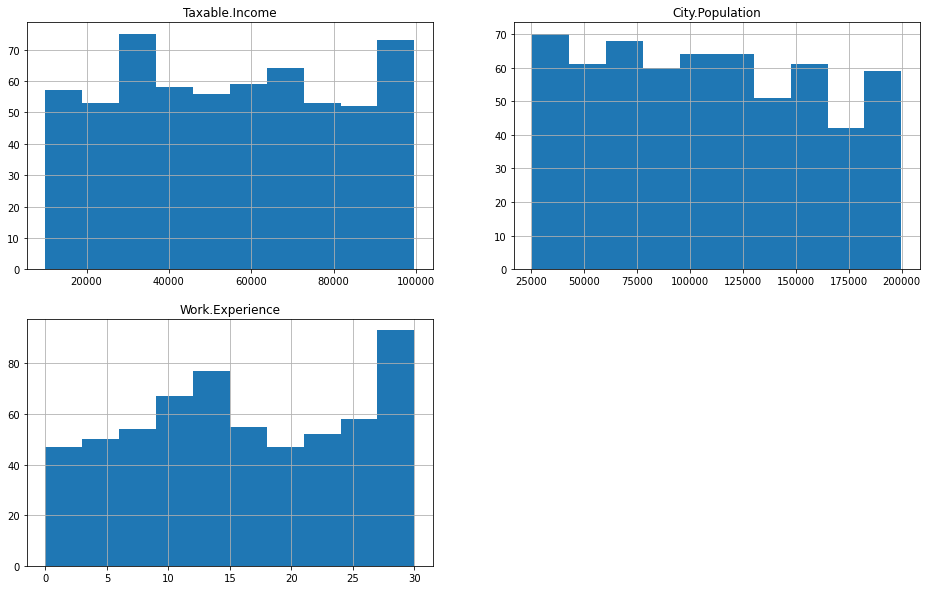

In [19]:
plt.subplots(figsize=(16, 10))

plt.subplot(2,2,1)
data['Taxable.Income'].hist()
plt.title("Taxable.Income")

plt.subplot(2,2,2)
data['City.Population'].hist()
plt.title("City.Population")

plt.subplot(2,2,3)
data['Work.Experience'].hist()
plt.title("Work.Experience")


### Boxplot and Histogram both in one

([<AxesSubplot:title={'center':'Taxable.Income'}>,
  <AxesSubplot:title={'center':'Taxable.Income'}>,
  Text(0.5, 1.0, 'Taxable.Income')],
 [<AxesSubplot:xlabel='Taxable.Income'>,
  <AxesSubplot:xlabel='Taxable.Income'>])

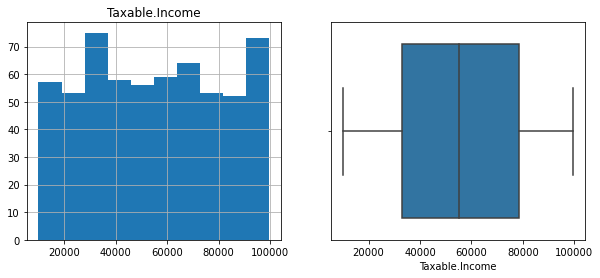

In [20]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),data['Taxable.Income'].hist(),plt.title("Taxable.Income")],[plt.subplot(1,2,2),sns.boxplot(x=data["Taxable.Income"])]

([<AxesSubplot:title={'center':'City.Population'}>,
  <AxesSubplot:title={'center':'City.Population'}>,
  Text(0.5, 1.0, 'City.Population')],
 [<AxesSubplot:xlabel='City.Population'>,
  <AxesSubplot:xlabel='City.Population'>])

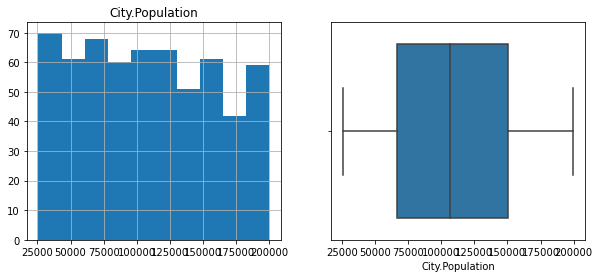

In [21]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),data['City.Population'].hist(),plt.title("City.Population")],[plt.subplot(1,2,2),sns.boxplot(x=data["City.Population"])]

([<AxesSubplot:title={'center':'Work.Experience'}>,
  <AxesSubplot:title={'center':'Work.Experience'}>,
  Text(0.5, 1.0, 'Work.Experience')],
 [<AxesSubplot:xlabel='Work.Experience'>,
  <AxesSubplot:xlabel='Work.Experience'>])

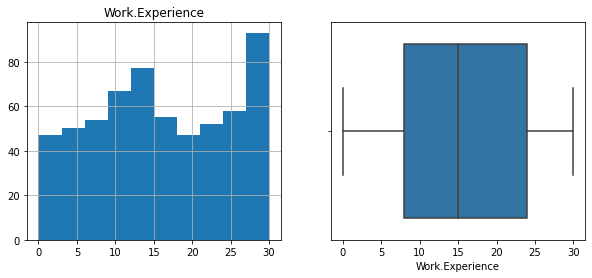

In [22]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),data['Work.Experience'].hist(),plt.title("Work.Experience")],[plt.subplot(1,2,2),sns.boxplot(x=data["Work.Experience"])]

In [6]:
data['Marital.Status'].unique(), data['Marital.Status'].value_counts()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [8]:
data['Undergrad'].unique(), data['Undergrad'].value_counts()

array(['NO', 'YES'], dtype=object)

In [10]:
data['Urban'].unique(), data['Urban'].value_counts()

array(['YES', 'NO'], dtype=object)

In [12]:
print('Maximum income in data set', data['Taxable.Income'].max())
print('Mimimum income in data set', data['Taxable.Income'].min())

Maximum income in data set 99619
Mimimum income in data set 10003


In [13]:
# adding one "Target " column in dataset
# in bins { bins = [10000= minimum data , 30000=condition , 99620=maximum data ]}
data["Target"] = pd.cut(data["Taxable.Income"], bins = [10000,30000,99620], labels = ["Risky", "Good"])

In [14]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Target
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [15]:
data['Target'].unique()

['Good', 'Risky']
Categories (2, object): ['Risky' < 'Good']

In [16]:
data['Target'].value_counts()

Good     476
Risky    124
Name: Target, dtype: int64

In [17]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
data['Marital.Status']= label_encoder.fit_transform(data['Marital.Status'])

In [31]:
data['Undergrad']= label_encoder.fit_transform(data['Undergrad'])

In [32]:
data['Target']= label_encoder.fit_transform(data['Target'])

In [33]:
data['Urban']= label_encoder.fit_transform(data['Urban'])

In [34]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Target
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0


In [35]:
x=data.iloc[:,0:8]
y=data['Target']

In [36]:
seed = 6
kfold = KFold(n_splits=10, random_state=seed, shuffle = True)

#if you want to specify random_state them shuffle must be True

#kfold = KFold(n_splits=10)

In [43]:
cart = DecisionTreeClassifier()
num_trees = 50
model = BaggingClassifier(base_estimator = cart,
                          n_estimators = num_trees,
                          random_state = seed)

In [44]:
final_result = cross_val_score(model, x, y, cv = kfold)
final_result

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.98333333])

In [45]:
print(final_result.mean())

0.9983333333333333


In [52]:
# Random Forest Classification
num_trees = 50
model_forest = RandomForestClassifier(n_estimators = num_trees,
                               max_features = 3)

In [53]:
result_forest = cross_val_score(model_forest, x, y, cv = kfold)
print(result_forest.mean())

1.0


In [54]:
# AdaBoost Classification

num_trees = 10
seed=7
model_adaboost = AdaBoostClassifier(n_estimators = num_trees,
                           random_state = seed)

In [68]:
result_adaboost = cross_val_score(model_adaboost, x, y, cv = kfold)
print(result_adaboost.mean())

1.0


In [69]:
# Stacking Ensemble for Classification

# create the sub models
estimators = []

model1_reg = LogisticRegression(max_iter=300)
estimators.append(('logistic', model1_reg))

In [70]:
model2_reg = DecisionTreeClassifier()
estimators.append(('cart', model2_reg))

In [71]:
model3_reg = SVC()
estimators.append(('svm', model3_reg))

In [72]:
# create the ensemble model

ensemble = VotingClassifier(estimators)

In [73]:
estimators

[('logistic', LogisticRegression(max_iter=300)),
 ('cart', DecisionTreeClassifier()),
 ('svm', SVC())]

In [74]:
results_final = cross_val_score(ensemble, x, y, cv = kfold)
print(results_final.mean())

0.9816666666666667
